In [2]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/"
file_name = "enron_unique_800_NER"
file = file_path+file_name+'.csv'

df_emails = pd.read_csv(file)
df_emails.tail(10)
deb = 0
fin = df_emails.shape[0]

In [5]:
# SAUVEGARDE en csv du résultat.
def svgd_csv_xls (file_path,file_name):

# to .CSV
  file_extension = ".csv"
  file = file_path+file_name+file_extension
  print("File : ",file)
  df_emails.to_csv(file, encoding='utf-8', index=False)
# df_emails[deb:fin].to_csv(file, encoding='utf-8', index=False)
  print("Svgde effectuée")
  return


# Vectorization with TF-IDF Vectorizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords

data = df_emails['body_clean']

#tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000, decode_error='ignore')
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features=None ,decode_error='ignore')
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)

tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names_out()).head()


tf_idf_dtm = pd.DataFrame(tf_idf_norm.toarray(), columns=tf_idf_vectorizor.get_feature_names_out()).head()
tf_idf_dtm


,00,000,0000,00000,000000,000000000010092,000000000011185,000000000029219,000000000035330,000000000041547,...,zones,zoning,zoom,zoomerang,zp26,zpro,zpros,zufferli,zulch,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


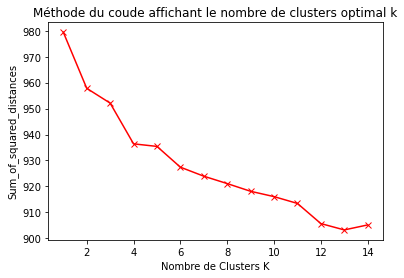

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(tf_idf)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Méthode du coude affichant le nombre de clusters optimal k')
plt.show()

In [8]:
# update k en fonction du matplotlib precedent
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(tf_idf)
labels=model.labels_
#
df_emails["labels"]=pd.Series(labels)
df_emails["labels"].value_counts()

2    720
0    232
1     25
3     23
Name: labels, dtype: int64

In [14]:
# affichage labels sur un échantillon aléatoire
# df_emails[labels==3][["labels","NER_header","NER_body","header"]].sample(20)
df_emails[["labels","NER_header","NER_body","header"]].sample(20)

,labels,NER_header,NER_body,header
754,0,(),"(20, 7, 2002=09, Hot Offers Win, New York Grea...",Cooking and Entertaining: St. Paddy's Day Trad...
822,2,"(Nov 7-8, NYC)","(Shapiro-R', Susan, Ken, Jeff, Jeff ', Octobe...",FW: Nov 7-8 NYC event
363,2,"(Karthik Rajan,)","(Login, k_rajan, Chonawee Supatgiat/Corp/Enron...",Karthik Rajan
203,2,"(30027,)","(ASSIGNMENT_REF, AZPS, SELLER_DUNS, 958982563,...",TRANSSTATUS 30027 CONFIRMED
670,0,(),"(Jon Cartwright, Monday, August 06, 2001, 9:52...",FW: ENERGY: Nuclear Mystery Close To Being Solved
413,2,"(nan,)","(Thanksgiving,)",NaN
402,0,"(TVA, FERC, Midwest, Southeast)","(Tom, Cynthia, TVA, FERC Staff, Investigation ...",(Has TVA info) FERC Staff Investigations on Mi...
72,2,(),"(BBQ,)",Re:
925,0,"(SAVE,)","(Paul, CDNOW, Hundreds, 9.99, 7.99, 15.99, 11....",SAVE Big - CDNOW Clearance Sale!
70,2,(),"(Patti, Scott, 02:11:17, PM, Larry.Campbell@en...","RE: Endangered Species Surveys, Red Rock Expan..."


In [16]:
file_name = file_name+"_cluster"
svgd_csv_xls (file_path,file_name)

File :  /content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/enron_unique_800_NER_cluster.csv
Svgde effectuée


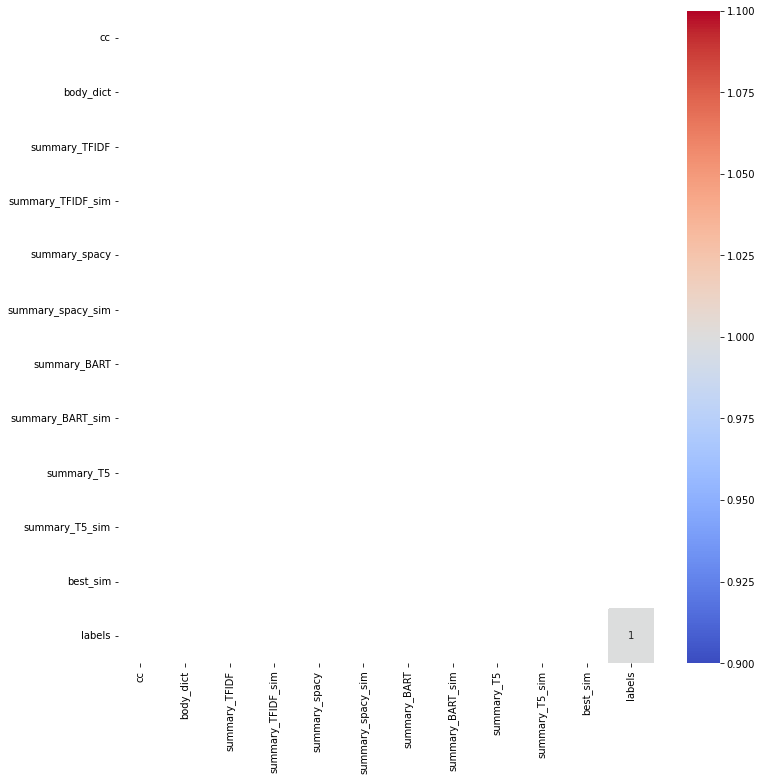

In [19]:
import matplotlib.pyplot as plt

import seaborn as sns
corr = df_emails.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='coolwarm');

# Bibliographie ou References

In [ ]:
# Test CAH avec Dendogramme
from sklearn.cluster import AgglomerativeClustering
# Initialisation du classificateur CAH pour 4 clusters
cluster = AgglomerativeClustering(n_clusters = 4)
# Apprentissage des données
ls_features = df_emails['NER_body']
cluster.fit(df_emails[ls_features])
# Calcul des labels du data set
labels = cluster.labels_
labels

In [ ]:
# https://medium.com/towards-data-science/k-means-clustering-8e1e64c1561c
# a voir ? https://www.kaggle.com/code/dfoly1/k-means-clustering-from-scratch/notebook
# https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z
# https://www.kaggle.com/code/dikshabhati2002/nlp-for-beginners
# https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis
# https://www.kaggle.com/code/liruffel/atelier-nlp/notebook

# guide A a Z Preprocessing : https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z